In [1]:
import cv2
import numpy

import os
import time
import math

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import random

In [2]:
DATA_FORMAT = ".png"
DATAPATH_TRAIN = "./imageTrain/"
DATAPATH_VALIDATE = "./imageValidate/"

RANDOM_CROP = 30
SIZE_PATCH = 32
SIZE_CONV = 6
SIZE_LABEL = (SIZE_PATCH - SIZE_CONV * 2)

SCALE = 4
INTERPOLATION = cv2.INTER_CUBIC

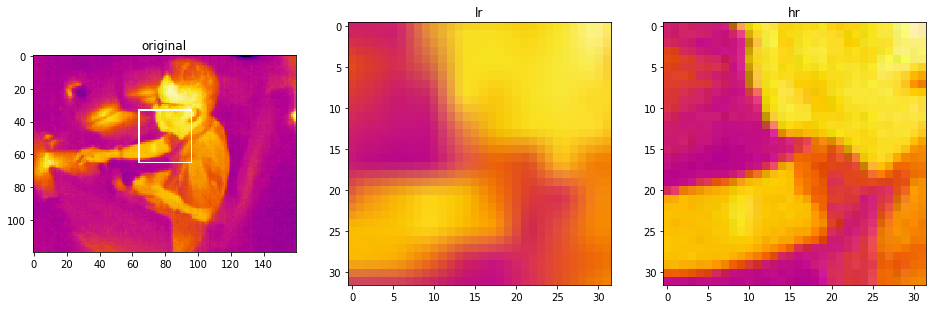

In [14]:
names = os.listdir(DATAPATH_TRAIN)
names = sorted(names)
nums = names.__len__()

i = random.randint(0, nums-1)
j = random.randint(0, RANDOM_CROP-1)

name = DATAPATH_TRAIN + names[i]

hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB)
shape = hr_img.shape

#hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
#hr_img = hr_img[:, :, 0]

lr_img = cv2.resize(hr_img, (int(shape[1] / SCALE), int(shape[0] / SCALE)), INTERPOLATION)
lr_img = cv2.resize(lr_img, (shape[1], shape[0]), INTERPOLATION)

Points_x = numpy.random.randint(0, min(shape[0], shape[1]) - SIZE_PATCH, RANDOM_CROP)
Points_y = numpy.random.randint(0, min(shape[0], shape[1]) - SIZE_PATCH, RANDOM_CROP)

lr_patch = lr_img[Points_x[j]: Points_x[j] + SIZE_PATCH, Points_y[j]: Points_y[j] + SIZE_PATCH]
hr_patch = hr_img[Points_x[j]: Points_x[j] + SIZE_PATCH, Points_y[j]: Points_y[j] + SIZE_PATCH]

hr_out = hr_img.copy()
cv2.rectangle(hr_out, (Points_y[j], Points_x[j]), (Points_y[j] + SIZE_PATCH, Points_x[j] + SIZE_PATCH), (255,255,255), 1)
    
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(hr_out)
plt.subplot(1,3,2)
plt.title('lr')
plt.imshow(lr_patch)
plt.subplot(1,3,3)
plt.title('hr')
plt.imshow(hr_patch)